## Resumo:

Neste desafio do módulo 1 do bootCamp Data Science da Alura, utilizei as técnicas aprendidas no módulo 1 e analisei a base de dados dos números de óbitos registrados no Brasil de 1970 retirado do Kaglle no endereço https://www.kaggle.com/amandalk/registered-deaths-brazil.


Segue a relação de análises feitas na base de dados:

1)  Preparação e verificação da consistência dos dados.

2)  Análise das mortes de 1970 a 1919 agrupadas por ano e por décadas.

3)  Análise da quantidade de mortes por estados.

4)  Análise da quantidade de mortes agrupadas por meses.

5)  Comparação dos registros de mortes de 2019, ano anterior a pandemia da COVID-19, e o ano de 2020 quando começou a pandemia.


# Análise dos dados:


## 1) Preparação e verificação da consistência dos dados.


Importação das bibliotecas a serem utilizadas na análise e definição dos parâmetros fixos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fonte_titulo_grafico = {"size":34}

query_70 = "Ano <= 1979"
query_80 = "Ano >= 1980 & Ano <= 1989"
query_90 = "Ano >= 1990 & Ano <= 1999"
query_00 = "Ano >= 2000 & Ano <= 2009"
query_10 = "Ano >= 2010"



Carregando os dados

In [2]:
fonte = "https://raw.githubusercontent.com/r10silveira/bootcampDataScience/master/dados/obitos-registro-civil.csv"

dados_original = pd.read_csv(fonte)

dados_original.rename(columns = {"year":"Ano","month":"Mês","state":"Estado","deaths":"Mortes"},inplace = True)
dados_original.head()


,Ano,Mês,Estado,Mortes
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65


Verificando a integridade dos dados

In [3]:
dados_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15030 entries, 0 to 15029
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ano     15030 non-null  int64 
 1   Mês     15030 non-null  int64 
 2   Estado  15030 non-null  object
 3   Mortes  15030 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 469.8+ KB


In [4]:
dados_original.isnull().sum()

Ano       0
Mês       0
Estado    0
Mortes    0
dtype: int64

In [5]:
dados_original.isna().sum()

Ano       0
Mês       0
Estado    0
Mortes    0
dtype: int64

Retirei o ano de 2020 para esta análise inicial, pois não está completo com todos os meses.

In [6]:
dados_original.query("Ano == '2020'")

,Ano,Mês,Estado,Mortes
14814,2020,1,AC,373
14815,2020,1,AL,1588
14816,2020,1,AP,283
14817,2020,1,AM,1337
14818,2020,1,BA,6854
...,...,...,...,...
15025,2020,8,RR,86
15026,2020,8,SC,4666
15027,2020,8,SP,31782
15028,2020,8,SE,1452


In [7]:
dados_original_sem_2020 = dados_original.query("Ano != 2020")
dados_original_sem_2020

,Ano,Mês,Estado,Mortes
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65
...,...,...,...,...
14809,2019,12,RR,186
14810,2019,12,SC,3157
14811,2019,12,SP,22863
14812,2019,12,SE,1031


## 2) Análise das mortes de 1970 a 2019 agrupadas por ano e por décadas.

In [8]:
mortes_por_ano = dados_original_sem_2020[["Ano","Mortes"]].groupby("Ano").sum()
mortes_por_ano.head()

,Mortes
Ano,
1970,272214
1971,281565
1972,288090
1973,316849
1974,316573


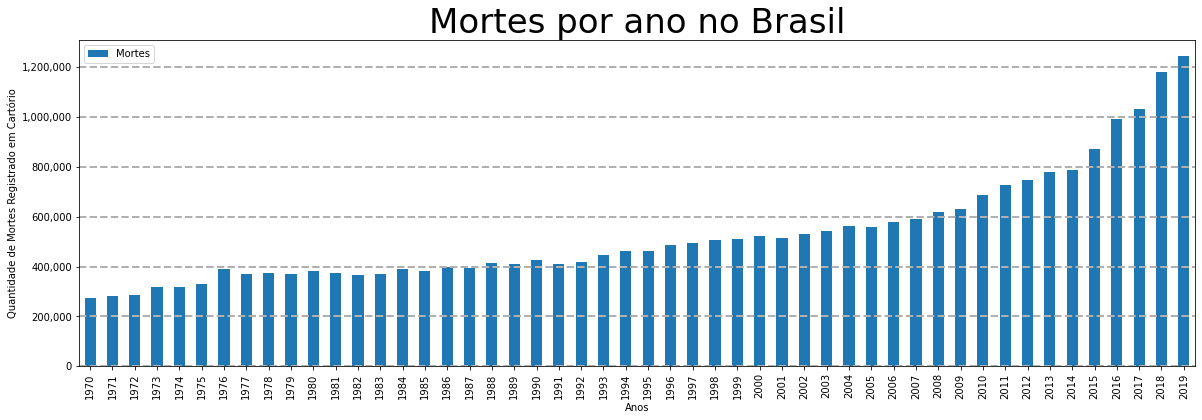

In [9]:


ax = mortes_por_ano.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title("Mortes por ano no Brasil",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()



### Podemos observar no gráfico que os anos que se destacam com uma maior variação do número de mortes são 1976,2016,2018. 

### A partir daqui vou separar os dados por décadas, para analisar os anos que se destacam e tentar responder o motivo do crescimento de mortes.



In [10]:
mortes_por_decada_70 = mortes_por_ano.query(query_70)
mortes_por_decada_80 = mortes_por_ano.query(query_80)
mortes_por_decada_90 = mortes_por_ano.query(query_90)
mortes_por_decada_00 = mortes_por_ano.query(query_00)
mortes_por_decada_10 = mortes_por_ano.query(query_10)

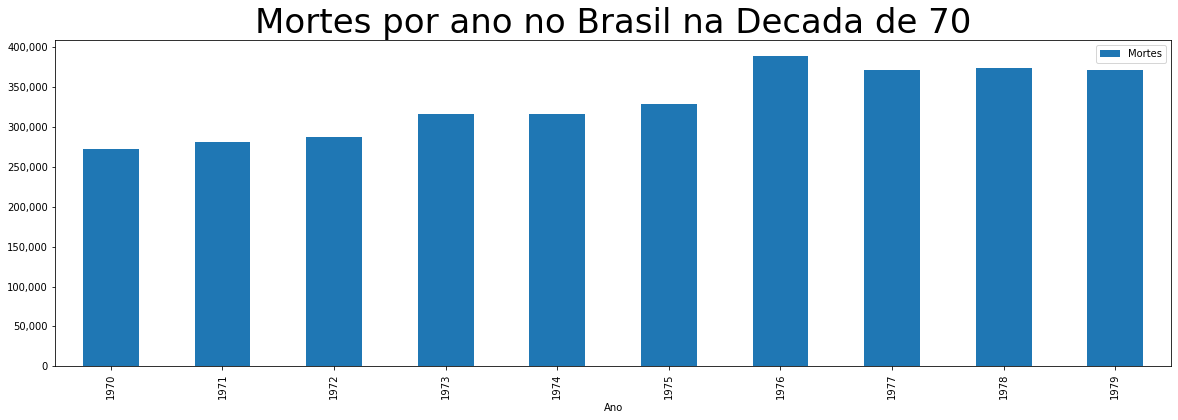

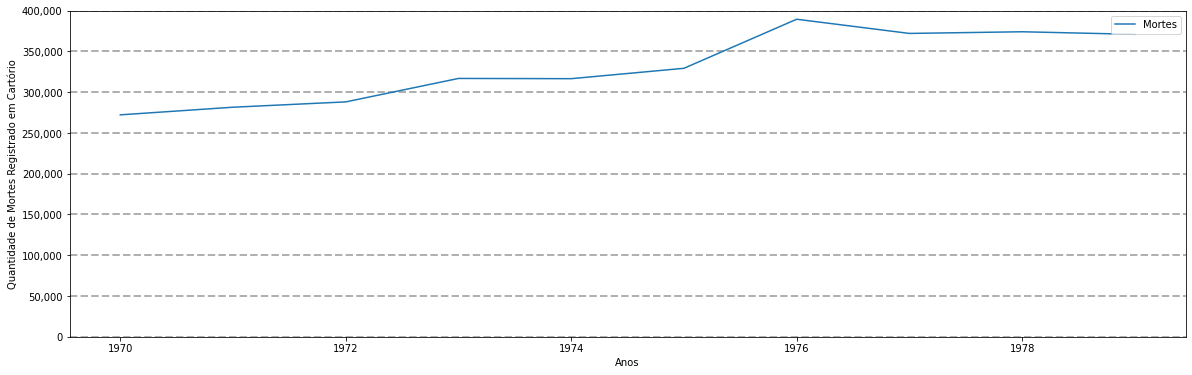

In [11]:
ax = mortes_por_decada_70.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_70.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,400000)

ax.set_title("Mortes por ano no Brasil na Década de 70",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)

plt.show()

### No gráfico dos anos de 1970 a 1979 podemos observar e confirmar que realmente no ano de 1976 houve um salto fora da curva em relação aos outros anos.
### Em pesquisa foi identificado que nesse ano foi implantando o SIM - Sistema de Informações sobre Mortalidade.
 http://aprendis.gim.med.up.pt/index.php/Sistema_de_Informa%C3%A7%C3%A3o_sobre_Mortalidade#:~:text=O%20SIM%20foi%20criado%20pelo,de%20cerca%20de%20seis%20anos)

### Será que a implantação desse sistema contribuiu para aumento de registros de mortes que até então não estavam sendo contabilizadas?

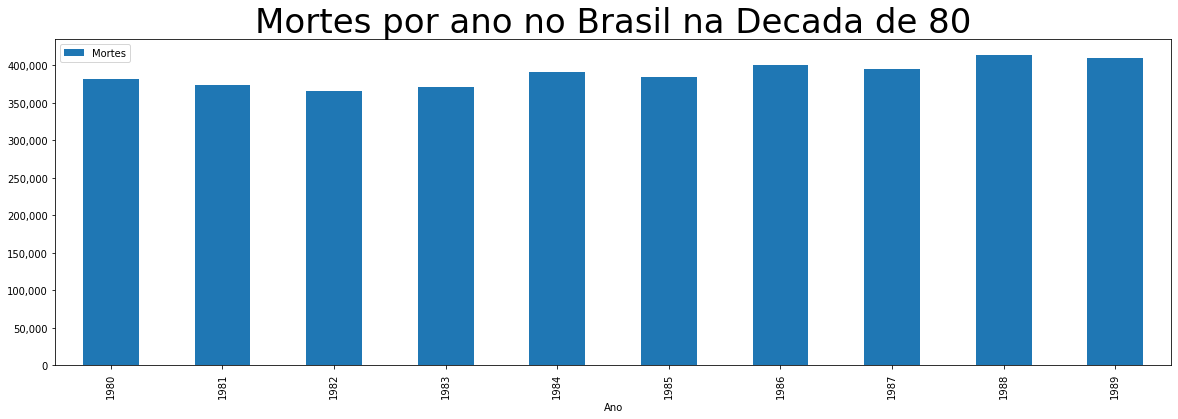

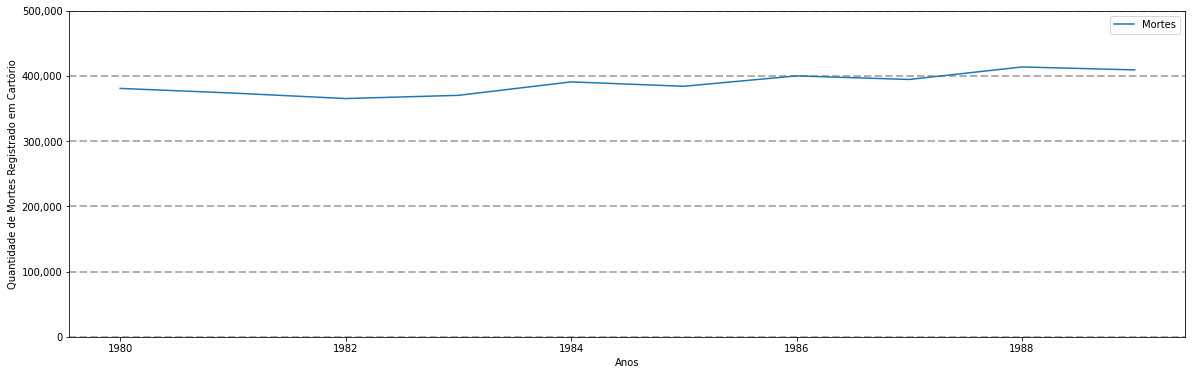

In [12]:
ax = mortes_por_decada_80.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_80.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,500000)

ax.set_title("Mortes por ano no Brasil na Década de 80",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

### De 1980 até 1989 não foi identificada nenhuma variação que se destaca.

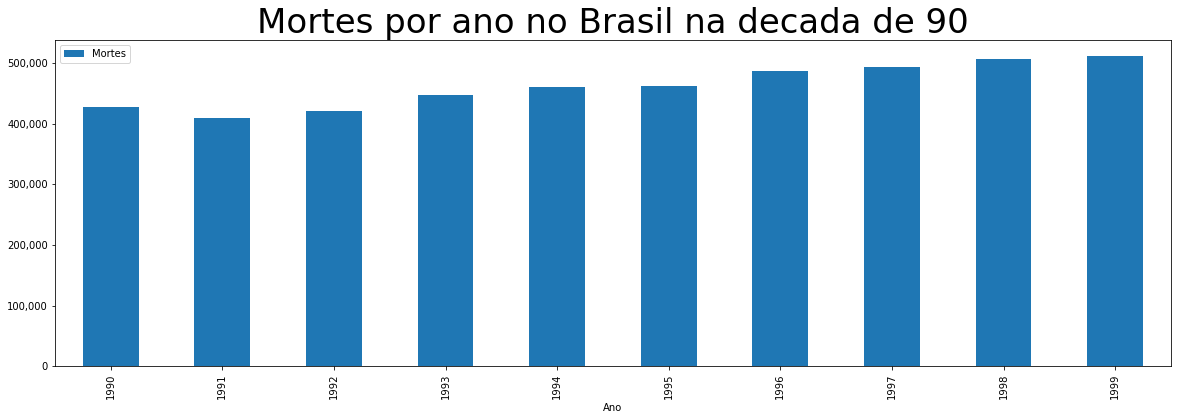

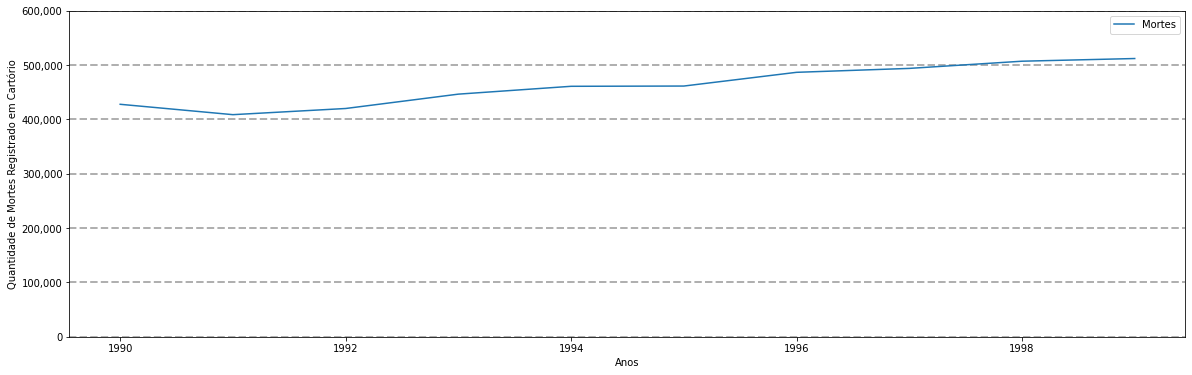

In [13]:
ax = mortes_por_decada_90.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_90.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,600000)

ax.set_title("Mortes por ano no Brasil na década de 90",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

### De 1990 até 1999 identifiquei um crescimento linear, mas sem nenhuma variação que se destaca.

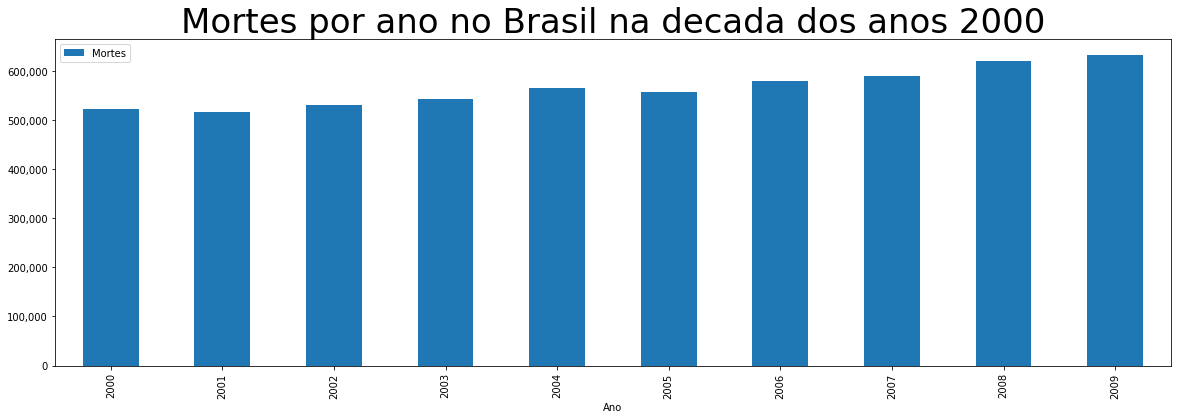

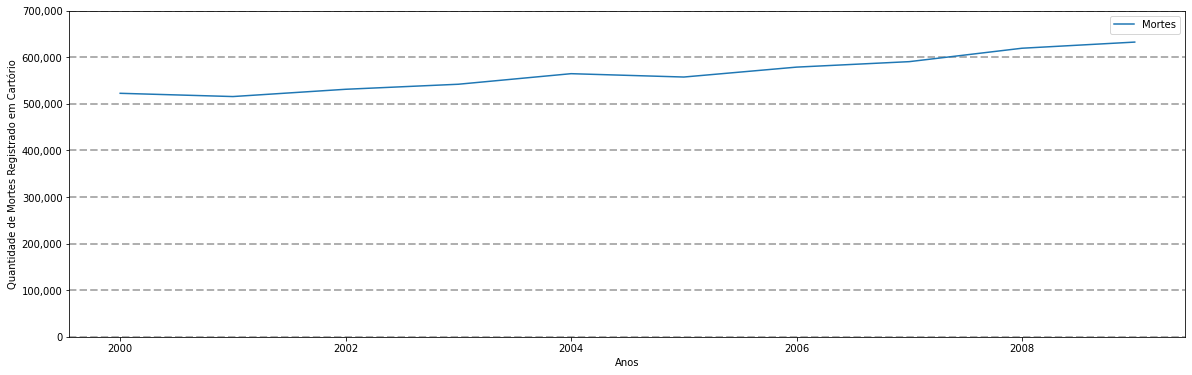

In [14]:
ax = mortes_por_decada_00.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_00.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,700000)

ax.set_title("Mortes por ano no Brasil na década dos anos 2000",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

### De 2000 até 2009 também identifiquei um crescimento linear,mas sem nenhuma variação com destaque.

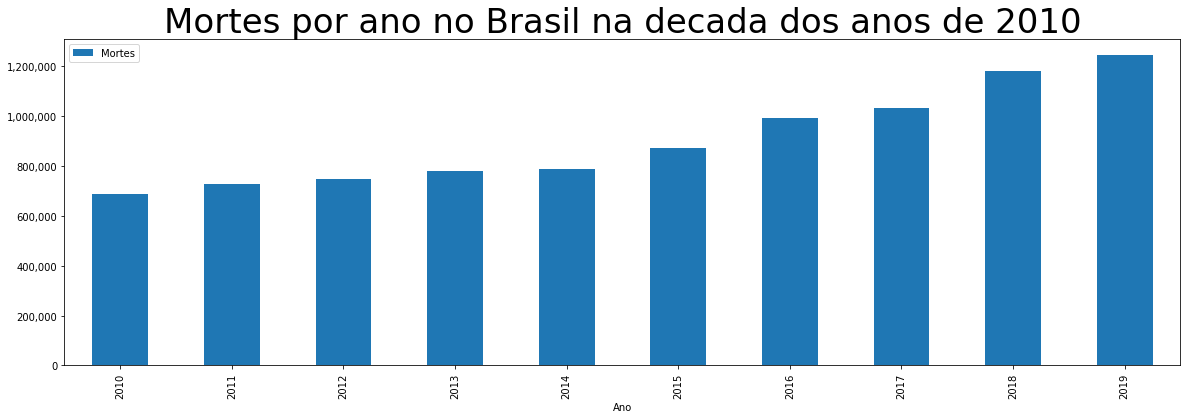

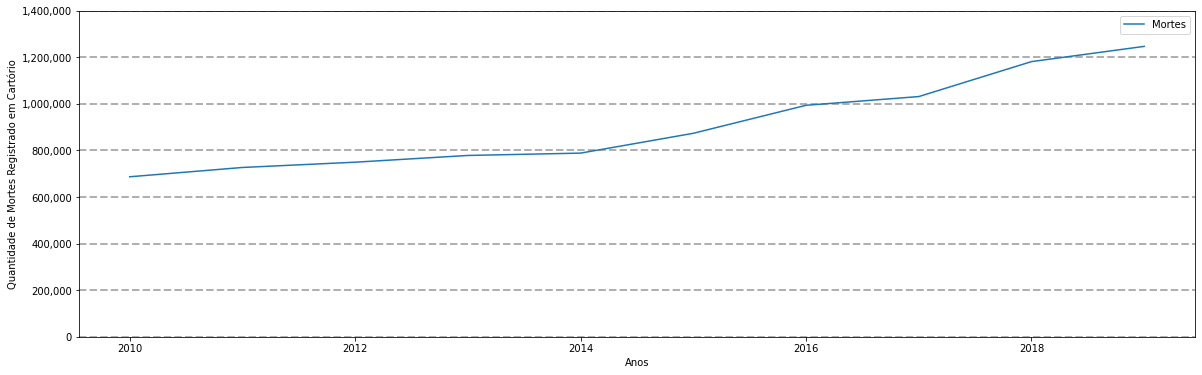

In [15]:
ax = mortes_por_decada_10.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_10.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,1400000)

ax.set_title("Mortes por ano no Brasil na década dos anos de 2010",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

### De 2010 até 2019 identifiquei um crescimento linear e maior comparado com as outras décadas, mas sem nenhum crescimento em destaque.



### Nos gráficos abaixo é possível identificar que a década de 2010 até 2019 foi a década com maior variação e aumento de número de mortes em comparação com as demais.

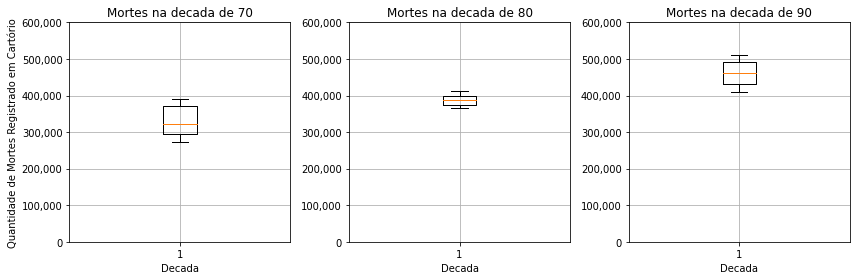

In [16]:

fig,ax =  plt.subplots(1,3,figsize = (12,4))

ax[0].boxplot(mortes_por_decada_70)
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].set_title("Mortes na decada de 70")
ax[0].grid(True)
ax[0].set_ylim(0,600000)
ax[0].set_xlabel("Década")
ax[0].set_ylabel("Quantidade de Mortes Registrado em Cartório")

ax[1].boxplot(mortes_por_decada_80)
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[1].set_title("Mortes na decada de 80")
ax[1].grid(True)
ax[1].set_ylim(0,600000)
ax[1].set_xlabel("Década")

ax[2].boxplot(mortes_por_decada_90)
ax[2].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[2].set_title("Mortes na década de 90")
ax[2].grid(True)
ax[2].set_ylim(0,600000)
ax[2].set_xlabel("Década")


fig.tight_layout()
plt.show()

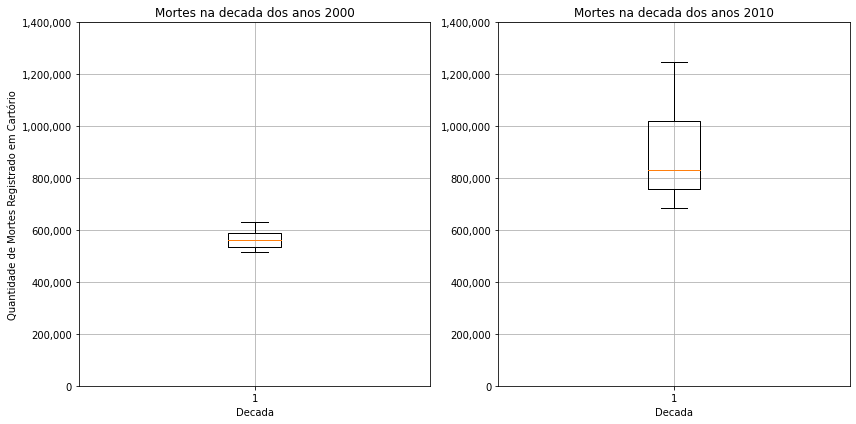

In [17]:
fig,ax =  plt.subplots(1,2,figsize = (12,6))

ax[0].boxplot(mortes_por_decada_00)
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].set_title("Mortes na década dos anos 2000")
ax[0].grid(True)
ax[0].set_ylim(0,1400000)
ax[0].set_xlabel("Década")
ax[0].set_ylabel("Quantidade de Mortes Registrado em Cartório")

ax[1].boxplot(mortes_por_decada_10)
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[1].set_title("Mortes na década dos anos 2010")
ax[1].grid(True)
ax[1].set_ylim(0,1400000)
ax[1].set_xlabel("Década")


fig.tight_layout()
plt.show()

### Podemos visualizar que o período que se destaca com relação em maior variação entre os anos é o período de 2010 a 2019.
### Tal crescimento se deve ao aumento da população com idade avançada no Brasil?

# 3)  Análise da quantidade de mortes por estados.

In [18]:
total_mortes_por_estado = dados_original_sem_2020[["Estado","Mortes"]].groupby(["Estado"]).sum().sort_values("Mortes",ascending=False)
total_mortes_por_estado.head()

,Mortes
Estado,
SP,11226341
MG,4104171
PR,2579750
PE,2387868
RS,913149


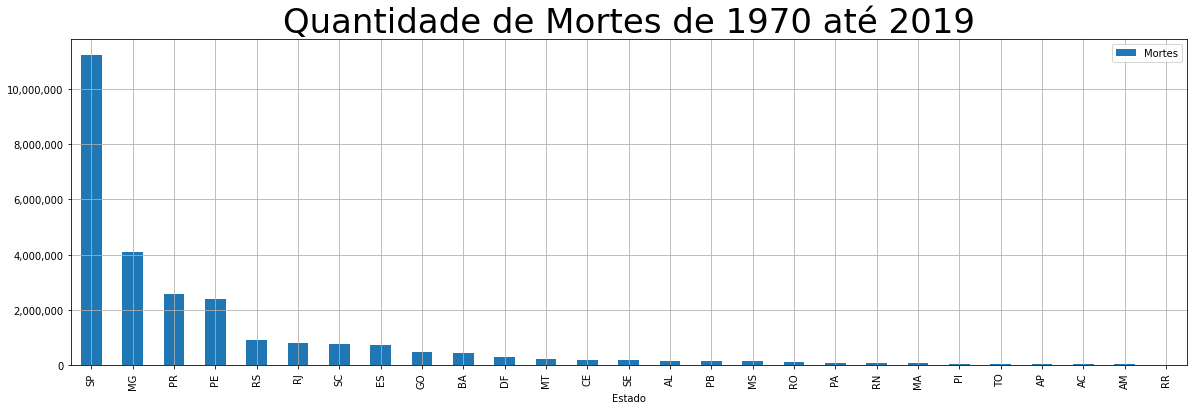

In [19]:
ax = total_mortes_por_estado.plot(kind="bar",figsize=(20,6),grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Quantidade de Mortes de 1970 até 2019",fontdict=fonte_titulo_grafico)

plt.show()

### Aqui fizemos um corte com destaque aos quatro maiores estados em número de mortes

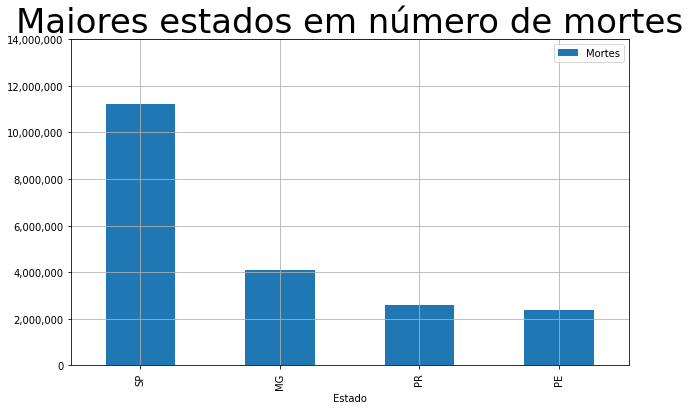

In [20]:
ax = total_mortes_por_estado.query("Estado in ['SP','MG','PR','PE']").plot(kind="bar",figsize=(10,6),grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Maiores estados em número de mortes",fontdict=fonte_titulo_grafico)
ax.set_ylim(0,14000000)
plt.show()

### Como podemos observar nos gráficos o estado de São Paulo tem quase 3 vezes mais mortes do que o segundo estado com maior números de mortes que é Minas Gerais.

### Agora iremos comparar a soma das mortes de todos os estados com o estado de São Paulo, que é onde está concentrado o maior número de mortes.

In [21]:
dados_mortes_sp_versus_outros_estados = dados_original_sem_2020.query("Estado != 'SP'")[["Ano","Mortes"]].groupby("Ano").sum()
dados_mortes_sp_versus_outros_estados["Mortes SP"] = dados_original_sem_2020.query("Estado == 'SP'")[["Ano","Mortes"]].groupby("Ano").sum()
dados_mortes_sp_versus_outros_estados.head()

,Mortes,Mortes SP
Ano,,
1970,109972,162242
1971,111753,169812
1972,112569,175521
1973,128113,188736
1974,123727,192846


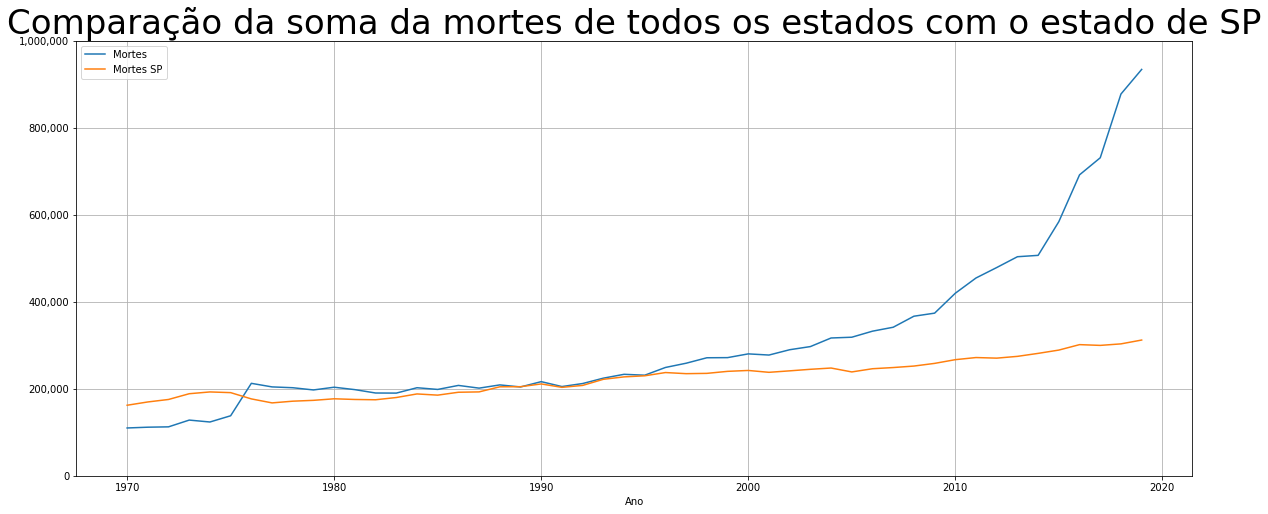

In [22]:
ax = dados_mortes_sp_versus_outros_estados.plot(figsize=(20,8),grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Comparação da soma da mortes de todos os estados com o estado de SP",fontdict=fonte_titulo_grafico)
plt.ylim(0,1000000)
plt.show()


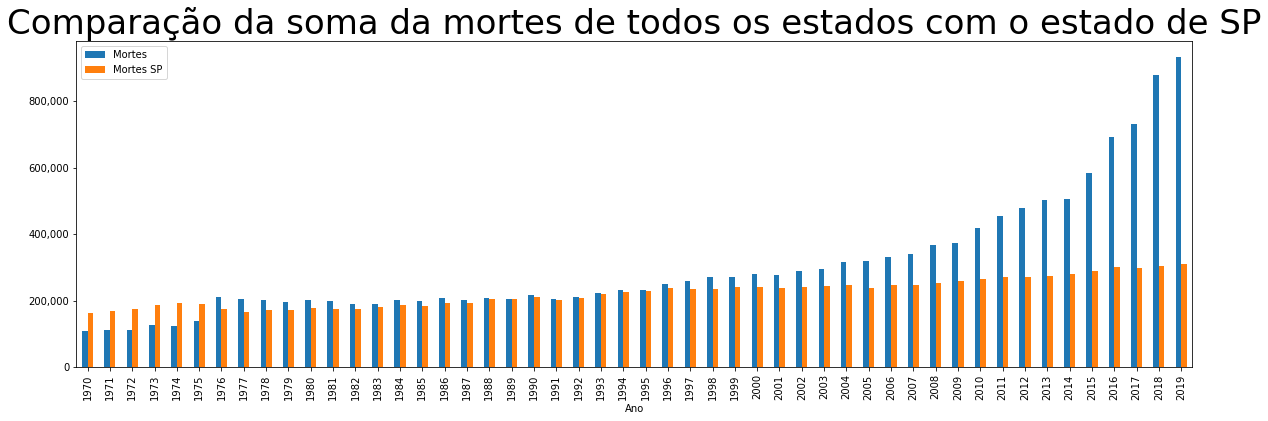

In [23]:
ax = dados_mortes_sp_versus_outros_estados.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Comparação da soma da mortes de todos os estados com o estado de SP",fontdict=fonte_titulo_grafico)
plt.show()

### Podemos observar que de 1970 a 1975 houve mais mortes no estado de SP do que em todos os estados somados, em 1976 houve uma mudança brusca. Do ano de 1977 a 1997 a comparação fica equilibrada e a partir de 1998 a soma das mortes nos outros estados aumenta muito enquanto as mortes em SP tem um leve aumento chegando em 2019 quase que 3 vezes menos mortes do que a soma de todos os estados.





### Irei demonstrar um gráfico da evolução dos estados com maiores mortes para identificar se algum se destaca no aumento de mortes

In [24]:
estados_mais_mortes = dados_original_sem_2020[["Mortes","Estado"]].groupby(["Estado"]).sum().sort_values("Mortes",ascending=False).head(7)
estados_mais_mortes.reset_index(inplace=True)
estados = estados_mais_mortes["Estado"]
estados = estados.tolist()
estados

['SP', 'MG', 'PR', 'PE', 'RS', 'RJ', 'SC']

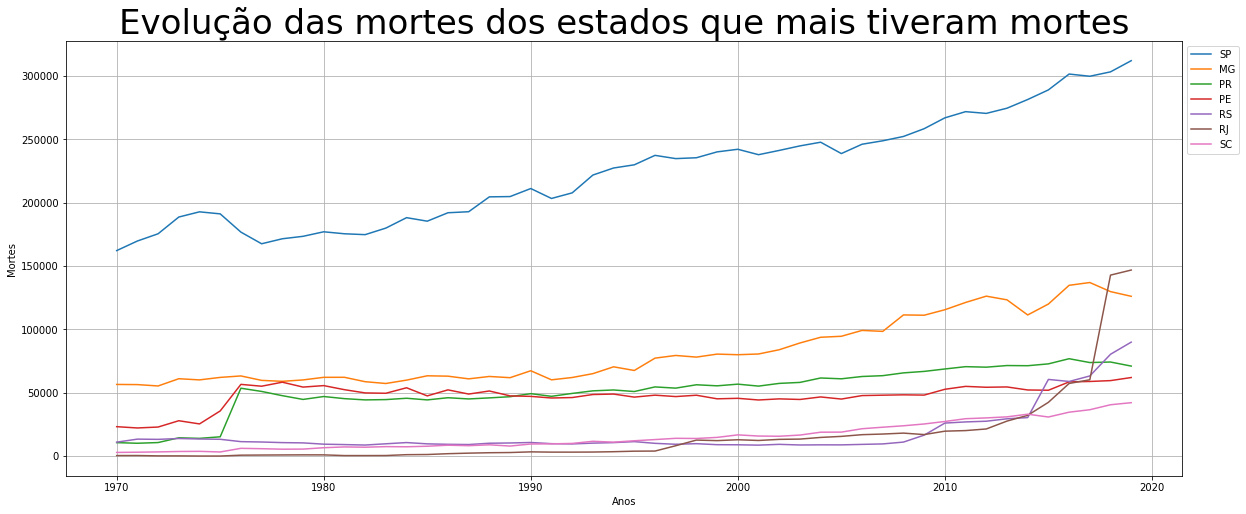

In [40]:

dados_estado = dados_original_sem_2020[["Ano","Mortes","Estado"]].groupby(["Ano","Estado"]).sum()
dados_estado.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(20,8))

for estado in estados:
    query_estado = f"Estado == '{estado}'"
    ax.plot(dados_estado.query(query_estado)["Ano"],dados_estado.query(query_estado)["Mortes"],label=estado)
    
plt.xlabel("Anos")
plt.ylabel("Mortes")
plt.title("Evolução das mortes dos estados que mais tiveram mortes",fontdict=fonte_titulo_grafico)

ax.legend(loc="best",bbox_to_anchor=(1, 1))
plt.grid()

plt.show()

### Podemos destacar os picos de mortes nos estados de Pernambuco e Paraná em 1976, um pico também do estado do Rio de Janeiro em 2017 e um constante aumento de mortes do estado de Minas Gerais ao passar dos anos.

# 4)  Análise da quantidade de mortes agrupadas por meses.

In [26]:
dados_original_sem_2020[["Mês","Mortes"]].groupby("Mês").sum()

,Mortes
Mês,
1,2220674
2,1948268
3,2166870
4,2132069
5,2292921
6,2344159
7,2466421
8,2342946
9,2183548


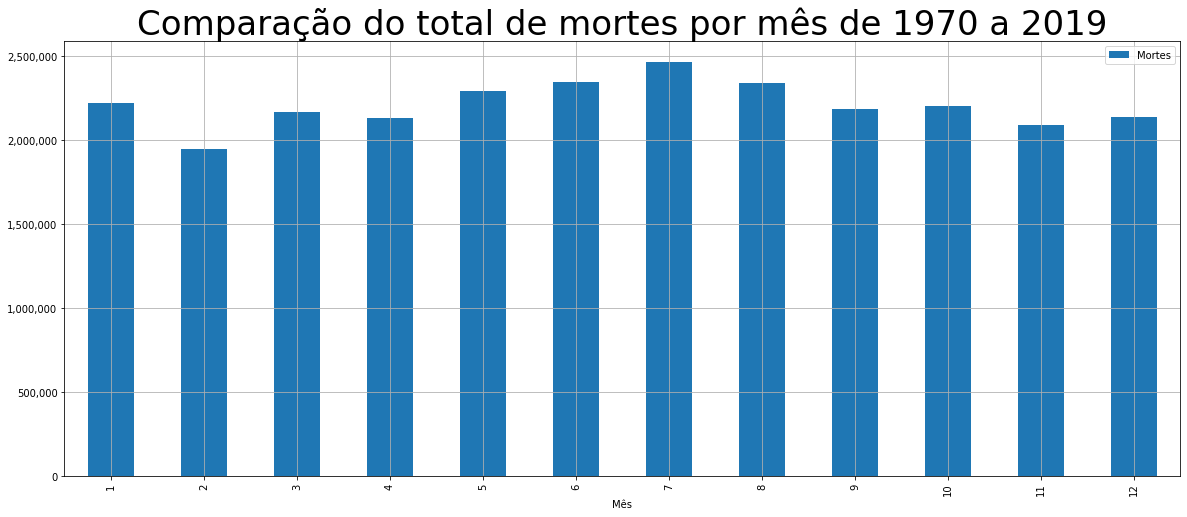

In [27]:
ax = dados_original_sem_2020[["Mês","Mortes"]].groupby("Mês").sum().plot(kind="bar",figsize=(20,8),grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Comparação do total de mortes por mês de 1970 a 2019",fontdict=fonte_titulo_grafico)
plt.show()


In [28]:
dados_mes = dados_original_sem_2020[["Ano","Mês","Mortes"]].groupby(["Ano","Mês"]).sum()
dados_mes.reset_index(inplace=True)

dados_mes_70 = dados_mes.query(query_70)[["Mês","Mortes"]].groupby("Mês").sum()
dados_mes_70.reset_index(inplace=True)

dados_mes_80 = dados_mes.query(query_80)[["Mês","Mortes"]].groupby("Mês").sum()
dados_mes_80.reset_index(inplace=True)

dados_mes_90 = dados_mes.query(query_90)[["Mês","Mortes"]].groupby("Mês").sum()
dados_mes_90.reset_index(inplace=True)

dados_mes_00 = dados_mes.query(query_00)[["Mês","Mortes"]].groupby("Mês").sum()
dados_mes_00.reset_index(inplace=True)

dados_mes_10 = dados_mes.query(query_10)[["Mês","Mortes"]].groupby("Mês").sum()
dados_mes_10.reset_index(inplace=True)


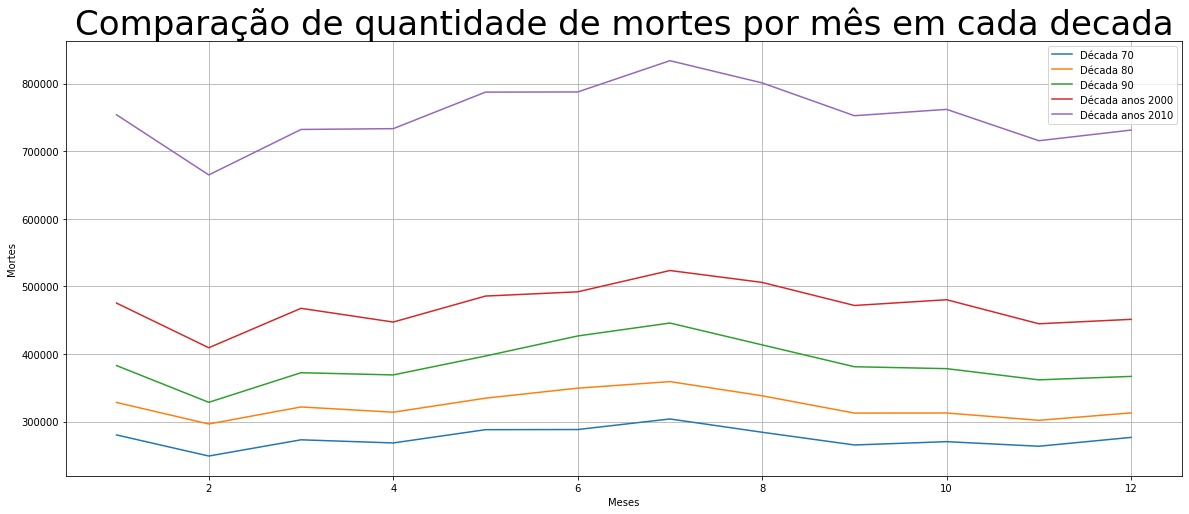

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dados_mes_70["Mês"],dados_mes_70["Mortes"],label="Década 70")
ax.plot(dados_mes_80["Mês"],dados_mes_80["Mortes"],label="Década 80")
ax.plot(dados_mes_90["Mês"],dados_mes_90["Mortes"],label="Década 90")
ax.plot(dados_mes_00["Mês"],dados_mes_00["Mortes"],label="Década anos 2000")
ax.plot(dados_mes_10["Mês"],dados_mes_10["Mortes"],label="Década anos 2010")
plt.xlabel("Meses")
plt.ylabel("Mortes")
plt.title("Comparação de quantidade de mortes por mês em cada década",fontdict=fonte_titulo_grafico)

ax.legend(loc="best",bbox_to_anchor=(1, 1))
plt.grid()

plt.show()

Podemos concluir que por ano ou década, o mês com maior registro de mortes é o mês de julho.

Hipótese: Podemos sugerir a hipótese de que a maior quantidade de mortes são registradas no mês de julho devido ao clima frio e seco propenso a incidência de gripes e doenças respiratórias.


# 5)    Comparação dos registros de mortes de 2019, ano anterior a pandemia da COVID-19, e o ano de 2020 quando começou a pandemia.

Inicialmente irei criar um conjunto de dados com os números de mortes de 2019 e 2020 do mês de janeiro a agosto, pois os registros na base de dados do ano 2020 só temos registros até agosto.

In [30]:
dados_ano_2020 = dados_original.query("Ano == 2020")[["Mês","Estado","Mortes"]]
dados_ano_2020

,Mês,Estado,Mortes
14814,1,AC,373
14815,1,AL,1588
14816,1,AP,283
14817,1,AM,1337
14818,1,BA,6854
...,...,...,...
15025,8,RR,86
15026,8,SC,4666
15027,8,SP,31782
15028,8,SE,1452


In [31]:
dados_ano_2019 = dados_original.query("Ano == 2019 and Mês <= 8")[["Mês","Estado","Mortes"]]
dados_ano_2019

,Mês,Estado,Mortes
14490,1,AC,298
14491,1,AL,1382
14492,1,AP,285
14493,1,AM,1209
14494,1,BA,6564
...,...,...,...
14701,8,RR,221
14702,8,SC,3796
14703,8,SP,27518
14704,8,SE,1105


In [32]:
dados_2019_2020 = pd.merge(dados_ano_2019,dados_ano_2020[["Mês","Estado","Mortes"]],left_on=["Mês","Estado"],right_on=["Mês","Estado"])

In [33]:
dados_2019_2020

,Mês,Estado,Mortes_x,Mortes_y
0,1,AC,298,373
1,1,AL,1382,1588
2,1,AP,285,283
3,1,AM,1209,1337
4,1,BA,6564,6854
...,...,...,...,...
211,8,RR,221,86
212,8,SC,3796,4666
213,8,SP,27518,31782
214,8,SE,1105,1452


In [34]:
dados_2019_2020.rename(columns={"Mortes_x" : "Mortes 2019","Mortes_y" : "Mortes 2020"},inplace=True)
dados_2019_2020

,Mês,Estado,Mortes 2019,Mortes 2020
0,1,AC,298,373
1,1,AL,1382,1588
2,1,AP,285,283
3,1,AM,1209,1337
4,1,BA,6564,6854
...,...,...,...,...
211,8,RR,221,86
212,8,SC,3796,4666
213,8,SP,27518,31782
214,8,SE,1105,1452


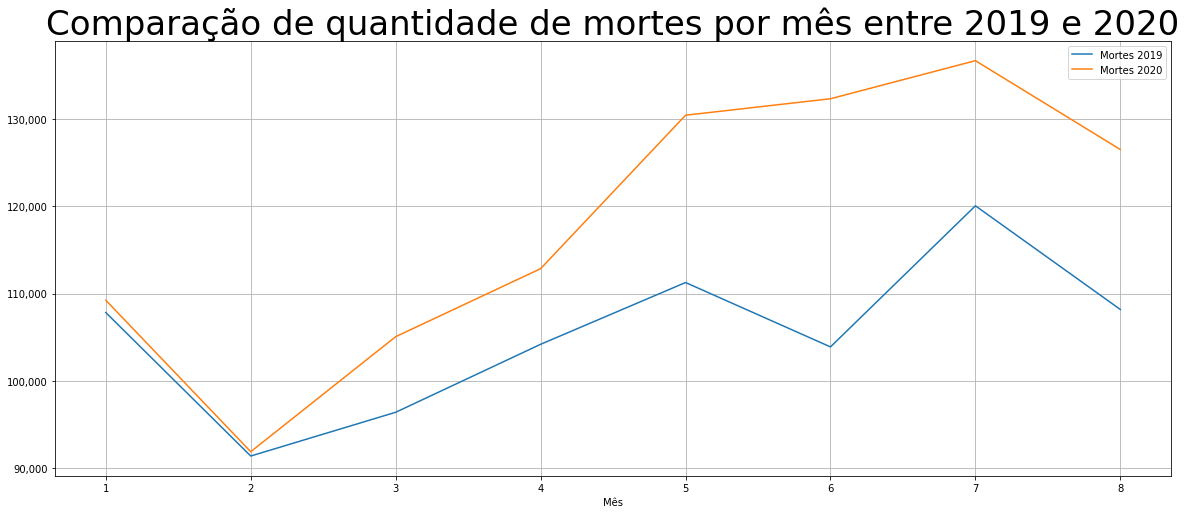

In [35]:
ax = dados_2019_2020[["Mês","Mortes 2019","Mortes 2020"]].groupby("Mês").sum().plot(figsize=(20,8),grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Comparação de quantidade de mortes por mês entre 2019 e 2020",fontdict=fonte_titulo_grafico)
plt.show()


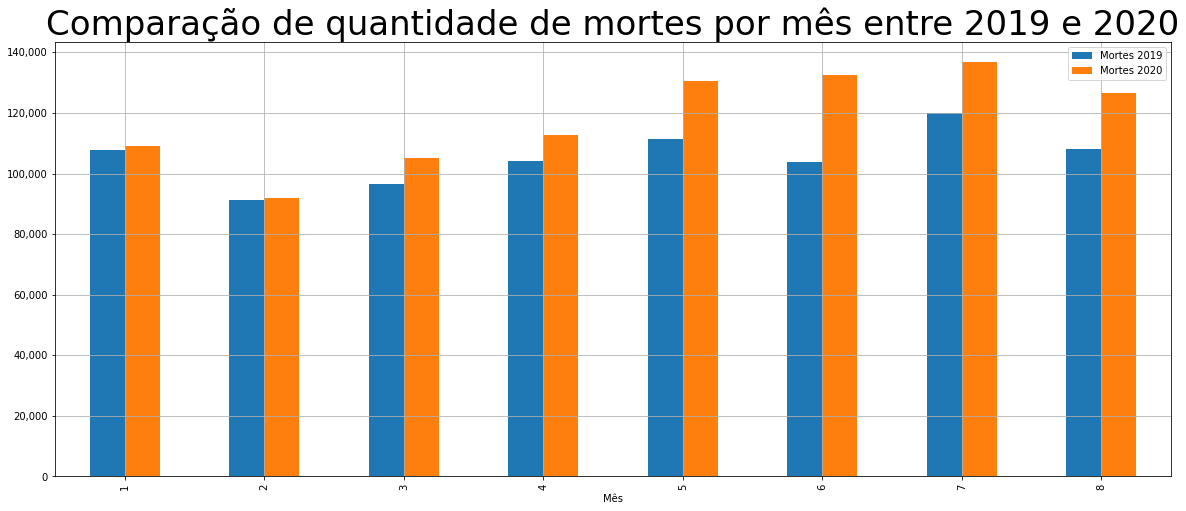

In [36]:
ax = dados_2019_2020[["Mês","Mortes 2019","Mortes 2020"]].groupby("Mês").sum().plot(kind="bar",figsize=(20,8),grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Comparação de quantidade de mortes por mês entre 2019 e 2020",fontdict=fonte_titulo_grafico)
plt.show()

Podemos ver um aumento de mortes a partir do mês de março do ano de 2020 em comparação com o ano de 2019, o que podemos concluir o aumento devido a pandemia COVID-19.

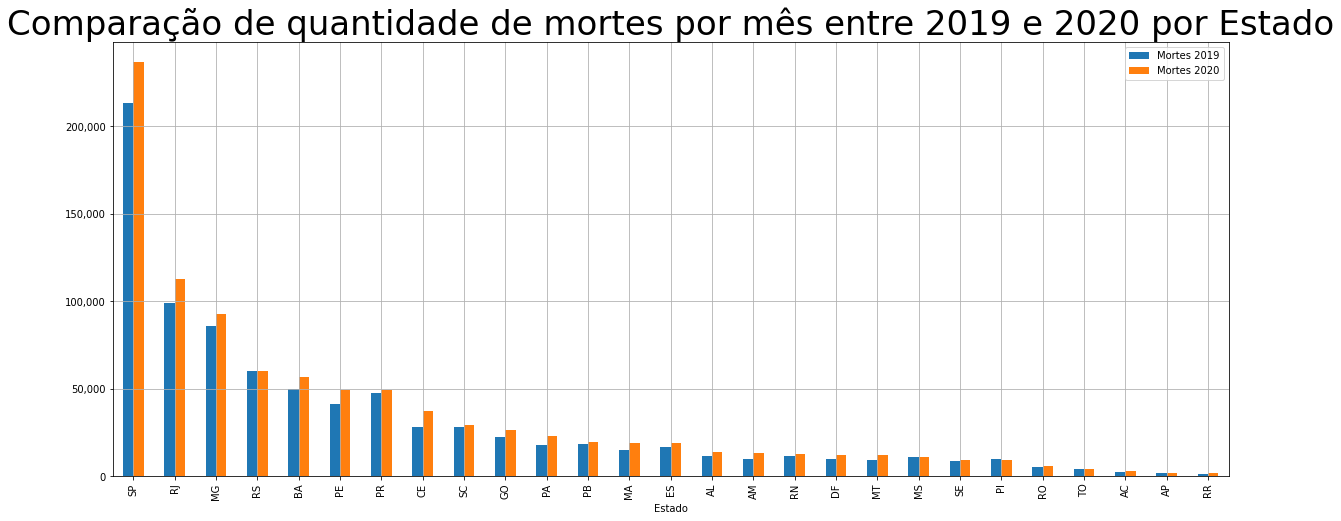

In [37]:
ax = dados_2019_2020[["Estado","Mortes 2019","Mortes 2020"]].groupby("Estado").sum().sort_values("Mortes 2020",ascending=False).plot(kind="bar",figsize=(20,8),grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Comparação de quantidade de mortes por mês entre 2019 e 2020 por Estado",fontdict=fonte_titulo_grafico)
plt.show()

Segue a comparação de 2019 e 2020 por Estado.